In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sc
from scipy.optimize import minimize
from scipy import stats

1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

In [17]:
def f(variables):
    a,b=variables
    return (4-2.1*a**2+(a**4)/3)*a**2+a*b+(4*b**2-4)*b**2
X0=[1,1]
res=minimize(fun=f ,x0=X0,bounds=((-2,2),(-1,1)) )
print(res)

print('\n for the initial guess on (0,0) : \n',minimize(f,(0,0),bounds=((-2,2),(-1,1))))

      fun: -1.0316284534898628
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([1.11022303e-07, 7.77156113e-07])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 42
      nit: 11
     njev: 14
   status: 0
  success: True
        x: array([-0.08984201,  0.71265644])

 for the initial guess on (0,0) : 
       fun: 0.0
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 4.e-08, -4.e-08])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([0., 0.])


2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

As we can see, at first sight, the function defined can fit the data on an aceptable way
Also, the time offset is the same for both variables.


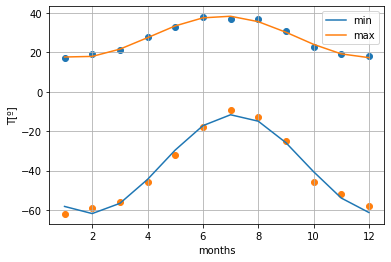

In [59]:
maxi=np.array([17,19,21,28,33,38,37,37,31,23,19,18])
mini=np.array([-62,-59,-56,-46,-32,-18,-9,-13,-25,-46,-52,-58])

#a possible good function to fit the data cuold be the sin(x) function
def f(x,a,b,c,d):
    return a*np.sin(b*x + d)+c

months=np.arange(1,13)
plt.scatter(months,maxi)
plt.scatter(months,mini)
plt.xlabel('months')
plt.ylabel('T[º]')

opt1,_=sc.optimize.curve_fit(f ,months ,mini)
opt2,_=sc.optimize.curve_fit(f ,months ,maxi,p0=[1,0,0,0])
#without guessing the initial amplitud the fitting is no good

plt.plot(months, f(months, *opt1),label='min')
plt.plot(months, f(months, *opt2),label='max')
plt.legend()
plt.grid()

print('As we can see, at first sight, the function defined can fit the data on an aceptable way')
print('Also, the time offset is the same for both variables.')


3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

       residuals  distances
0       1.100000       16.0
1      -1.950000        6.3
2      -7.200000        3.4
3      -4.150000        8.4
4      -6.590000        1.7
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[11131 rows x 2 columns]
[  8.  13.   6.   9.  13.  19.  16.  15.  18.  15.  13.  15.  17.  17.
  28.  20.  18.  25.  14.  20.  20.  21.  24.  28.  30.  28.  27.  26.
  34.  32.  44.  47.  57.  87.  77. 107. 112. 125. 190. 200. 272. 322.
 351. 409. 493. 592. 656. 693. 655. 677. 645. 510. 431. 348. 285. 249.
 153. 170. 122. 113.  98.  67.  63.  49.  41.  43.  26.  34.  24.  20.
  25.  20.  18.  16.  21.  15.   8.   7.   6.  10.   5.  10.  10.   8.
   5.   4.   6.   8.   4.   5.   4.   3.   4.   6.   3.   3.   3.   4.
   1.   1.]
[ 6.36899326e+02 -8.49877796e-02 -1.10996972e+01  2.00293441e+01]

 the R^2 is:  -5278347214169106.0
the p-value is:  0.0  As we 

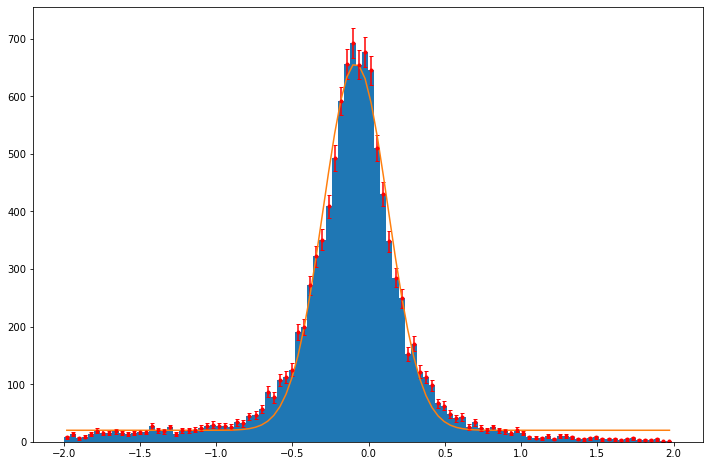

In [36]:
df=pd.DataFrame(np.load('residuals_261.pkl', allow_pickle=True).item())
print(df)
residuals=df['residuals'].values
#after a first glance of the result we see that we can bound the data to make a better study of it
residuals = residuals[residuals > -2]
residuals = residuals[residuals < 2]
distances = df['distances']

plt.figure(figsize=(12,8))
h, edges, _ = plt.hist(residuals, bins=100)
print(h)
midd = np.array([edges[i-1]+(edges[i]-edges[i-1])/2 for i in range(1,len(edges))])
plt.errorbar(midd, h, yerr = np.sqrt(h), fmt='r.', capsize=2)

#Looking at the histogram maybe we can fit the data with a gaussian type function.

def g(x, a, b, c, d):
    return a*np.exp(( ((x - b)**2)*c )) + d

opt3,_=sc.optimize.curve_fit(g ,midd , h, p0 = [700,0,0,0])
print(opt3)
plt.plot(midd , g(midd, *opt3))
#godnees of fitting
ys=g(midd,*opt3)
ssr=np.sum(ys-h)**2
yt=np.mean(h)
tss=np.sum(yt-h)**2

R=1.-(ssr/tss)
#chi2 thest
sig=np.sqrt(np.abs(h))
chi2=np.sum(((h-ys)**2)/sig)
pvalue = 1. - stats.chi2.cdf(chi2, len(midd)-1)
print('\n the R^2 is: ',R)
print('the p-value is: ',pvalue, ' As we observe it is satisfactory. ')

4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is necessary.


 best parameters founded: 
 [-9.67127679 12.34271735  9.0525621 ]

 the average temperature of Munich is:  9.0525621024537 Cº

 the maximum will be:  18.723838890445855 Cº

 the miniimum will be:  -0.6187146855384551 Cº
b is the phase of the function, in charge of adjusting the starting point of it.
its physical meaning could be the interval of days on which the real data are, for example for b=12 it means that the real data are  +-12 days ahead or back from the fit

 the sum of residuals for f(t):  694209.8326248894

 the sum of residuals for g(t):  694186.2523893423
the extra parameter is needed


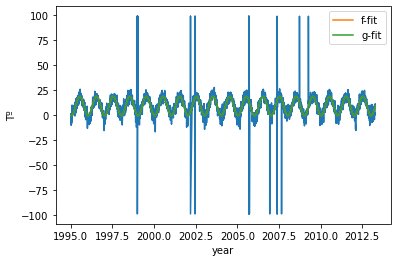

In [13]:
munich=np.loadtxt('munich_temperatures_average_with_bad_data.txt')
def fu(x, a, b, c):
    return a*np.cos(2*np.pi*x +b)+c
year=munich[:,:1].flatten()
temp=munich[:,1:].flatten()
plt.plot(year,temp)
#.flatten() because arrays need to be 1-D for optimizing
opt4,_=sc.optimize.curve_fit(fu , year, temp)
plt.plot(year,fu(year, *opt4), label='f-fit')
plt.xlabel('year')
plt.ylabel('Tº')
print('\n best parameters founded: \n', opt4)
#the average temp given by the fit will be given by the parameter c, 
print('\n the average temperature of Munich is: ', opt4[2],'Cº')
#the maximum will be the average+amplitud, and viceversa for the minimun
print('\n the maximum will be: ', opt4[2]-opt4[0],'Cº')
print('\n the miniimum will be: ', opt4[2]+opt4[0],'Cº')
print('b is the phase of the function, in charge of adjusting the starting point of it.')
print('its physical meaning could be the interval of days on which the real data are, for example for b=12 it means that the real data are  +-12 days ahead or back from the fit')

def gu(x, a, b, c, d):
    return a*np.cos(2*np.pi*x*b +c)+d
opt5,_=sc.optimize.curve_fit(gu , year, temp)
plt.plot(year,gu(year, *opt5), label='g-fit')
plt.legend()

yf=np.array([(fu(year,*opt4))])
rrsf=np.sum((yf-temp)**2)
yg=np.array([(gu(year,*opt5))])
rrsg=np.sum((yg-temp)**2)
print('\n the sum of residuals for f(t): ',rrsf)
print('\n the sum of residuals for g(t): ', rrsg)

def F(s1, s2, n1, n2, N):
    Fish= (((s1 - s2)/(n2 - n1)) / (s2/(N - n2)))
    cl=1. - stats.f.cdf(Fish, n2 - n1, N - n2)
    if cl<0.1:
        print('\nthe extra parameter is not needed ')
        return 
    else:
        print('\nthe extra parameter is needed')
        return

F(rrsf, rrsg, 3-1, 4-1, len(year))
